## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score

# Linear Regression

🎯 In this exercise, you will model the performance of an NBA player's win rating (`win_rating`) according to their game statistics (like minutes played, `mp`). 

❓ Load the `NBA.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

In [2]:
link="https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/NBA.csv"
df = pd.read_csv(link)
df.head()



,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614


ℹ️ You can read a detailed description of the dataset in the challenge README. Make sure to refer to it throughout the challenge.

## 1. Define Feature Set and Target

🎯 The first objective is to model the players' overall performance rating compared to peers, called *Wins Above Replacement*, (`win_rating`) against the minutes that they've played (`mp`)

❓ Assign those two variables to `X` and `y`. Remember that `X` is the feature(s), and `y` is the target.

In [3]:
X = df[['mp']] #Number of minutes played
y = df[['win_rating']] #Model for the players overall performance rating, based on number of minutes played named "Wins Above Replacement"

👇 In a [scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html), visualize the relationship between the rating and the minutes played.

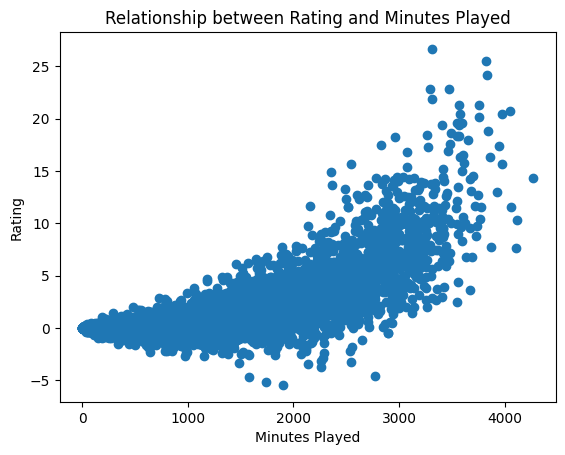

In [4]:
# importing matplotlib.pyplot as plt

plt.scatter(X, y)
plt.xlabel('Minutes Played')
plt.ylabel('Rating')
plt.title('Relationship between Rating and Minutes Played')
plt.show()

ℹ️ The scatter plot should hint that there is a relationship. But is it a perfectly linear relationship? 🤔 We'll see!

## 2. Cross-Validation

👇 Using Sklearn's [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html), run a 5-fold cross-validation on a [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model predicting the player performance rating from minutes played. Save the raw output of the cross-validation under a new variable called `cv_results`.

In [5]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
import numpy as np
model = LinearRegression()
cv_results = cross_validate(model, X, y, cv=5, return_train_score=True)

print(cv_results)
cross_val_score(model, X, y, cv=5)

{'fit_time': array([0.00856709, 0.00319409, 0.00213027, 0.00210023, 0.00178123]), 'score_time': array([0.00291777, 0.00167489, 0.00202799, 0.00181293, 0.00124383]), 'test_score': array([0.5555057 , 0.53447908, 0.53790391, 0.57658459, 0.57917762]), 'train_score': array([0.56003925, 0.56367302, 0.5653569 , 0.55561258, 0.55502215])}


array([0.5555057 , 0.53447908, 0.53790391, 0.57658459, 0.57917762])

❓ What is the lowest score of the cross-validation? Compute your answer and save the value under a new variable called `min_score`.

In [6]:
# Creating an array with the cross-validation scores
scores = np.array([0.5555057, 0.53447908, 0.53790391, 0.57658459, 0.57917762])

# Finding the minimum score from the array
min_score = min(scores)

print(min_score)

0.53447908


❓ What is the highest score of the cross-validation?  Compute your answer and save the value under a new variable called `max_score`.

In [7]:
max_score = max(scores)
print(max_score)

0.57917762


❓ What is the mean score of the cross-validation? Compute your answer and save the value under a new variable called `mean_score`.

In [8]:
mean_score = np.mean(scores)
print(mean_score)

0.55673018


ℹ️ When running a cross-validation, we always look at the mean score as the most robust and representative evaluation of the model's performance.

### ☑️ Test your code

In [9]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'cv_results',
    cv_result = cv_results,
    mean_score = mean_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/ramzimalhas/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/ramzimalhas/code/ramzimalhas/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_cv_results.py::TestCvResults::test_cv_mean PASSED                   [ 50%]
test_cv_results.py::TestCvResults::test_cv_results PASSED                [100%]

============================== 2 passed in 0.19s ===============================


💯 You can commit your code:

git add tests/cv_results.pickle

git commit -m 'Completed cv_results step'

git push origin master



❓ Plot the evolution of **<u>total</u> computational time (fitting and scoring)** and **<u>mean</u> score** as `K` increases from 2 to 20.

In [11]:
# YOUR CODE HERE

ℹ️ You should see that the $R^2$ score stays stable, which is a good sign that the model performs equally on smaller and larger test sizes. Meanwhile, the computational time keeps increasing. For that reason, we do not exceed K = 10 as a rule of thumb.

## 3. Train the Model

Cross-validation does not train a model, it evaluates a hypothetical model on the dataset. If you want to use the model to, for example, make predictions, you will need to train it outside of the cross-validation.

❓ Go ahead and train the model on the full `X` and `y` (as we've already validated the model's score, and now will use it to predict). Save the trained model under the variable `model`.

In [17]:
model.fit(X,y)

LinearRegression()

❓ What is the slope of your trained model? It can be accessed via the model's attributes. Save the slope under a variable named `slope`.

In [33]:
model.coef_

slope = 0.00260258

❓ What is the intercept of your trained model? It can be accessed via the model's attributes. Save the intercept under a variable named `intercept`.

In [38]:
model.intercept_ 

intercept = -1.54637494


🤔 Make sure you understand how to interpret these coefficients before moving on.

### ☑️ Test your code

In [39]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'trained_model',
    slope = slope,
    intercept = intercept
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/ramzimalhas/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/ramzimalhas/code/ramzimalhas/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_trained_model.py::TestTrainedModel::test_intercept PASSED           [ 50%]
test_trained_model.py::TestTrainedModel::test_slope PASSED               [100%]

============================== 2 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/trained_model.pickle

git commit -m 'Completed trained_model step'

git push origin master



## 4. Predict

❓ Use your trained model to predict the performance rating of a player who has played 1000 minutes in total. Save the predicted value in a variable called `prediction`.

In [57]:
#to predict the performance rating of a player who played 1000 minutes in total. And to save the prediction in a variable called "prediction"

df_corrected = pd.DataFrame([1000], columns=['mp'])

prediction = model.predict(df_corrected)

print(df.columns) 

Index(['minutes_played'], dtype='object')


### ☑️ Test your code

In [58]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'prediction',
    prediction = prediction
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/ramzimalhas/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/ramzimalhas/code/ramzimalhas/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_prediction.py::TestPrediction::test_prediction PASSED               [100%]

============================== 1 passed in 0.12s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master



## 5. Improving the Model with More Features

Your friend who enjoys the NBA fantasy league comes to you with some insights 🏀

They say that when evaluating a player's Wins Above Replacement rating, they would typically also look at the number of ball possessions (`poss`), their defense/offense ratio, and their pacing.

import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import LinearSVC

# Load the dataset
data = pd.read_csv('penguins.csv')

# Drop rows with missing values
data = data.dropna()

# Convert categorical features to numerical using LabelEncoder
le = preprocessing.LabelEncoder()
data['species'] = le.fit_transform(data['species'])
data['island'] = le.fit_transform(data['island'])
data['sex'] = le.fit_transform(data['sex'])

# Define features and target
X = data.drop('species', axis=1)
y = data['species']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One vs Rest
ovr = OneVsRestClassifier(LinearSVC(random_state=42))
ovr.fit(X_train, y_train)
print('One vs Rest accuracy: ', ovr.score(X_test, y_test))

# One vs One
ovo = OneVsOneClassifier(LinearSVC(random_state=42))
ovo.fit(X_train, y_train)
print('One vs One accuracy: ', ovo.score(X_test, y_test))

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df.columns)

Index(['minutes_played'], dtype='object')


<details>
    <summary>💡 Click here for a hint</summary>
    A seaborn <code>regplot</code> might be very handy here.
</details>

Now let's see if the model with two features (the new one you picked and `mp`) is better at predicting a player's rating than our first model.

❓ Create a new set of features - it should be a DataFrame with two columns.

In [ ]:
# YOUR CODE HERE

❓ Now cross-validate a new linear regression model and save the **mean** score to `mean_2_feat_score`.

> Note: if you only care about the cross-validation score, you can use sklearn's [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [ ]:
# YOUR CODE HERE

### ☑️ Test your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'improved_score',
    improved_score = mean_2_feat_score
)

result.write()
print(result.check())

You should see an **increase of around 8%** in your $R^2$ 👏

Congrats, you just performed your first manual *feature selection* - we'll see more ways to do that this week!

🤔 But is this the best we can do with Linear Regression? Let's explore more in the next challenge!

# 🏁